In [1]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint, EvalExponentialPdf, MakePoissonPmf, MakeMixture
import thinkplot

In [2]:
def EvalWeibullPdf(x, lam, k):
    """Computes the Weibull PDF.

    x: value
    lam: parameter lambda in events per unit time
    k: parameter

    returns: float probability density
    """
    arg = (x / lam)
    return k / lam * arg**(k-1) * np.exp(-arg**k)

def EvalWeibullCdf(x, lam, k):
    """Evaluates CDF of the Weibull distribution."""
    arg = (x / lam)
    return 1 - np.exp(-arg**k)

def MakeWeibullPmf(lam, k, high, n=200):
    """Makes a PMF discrete approx to a Weibull distribution.

    lam: parameter lambda in events per unit time
    k: parameter
    high: upper bound
    n: number of values in the Pmf

    returns: normalized Pmf
    """
    xs = np.linspace(0, high, n)
    ps = EvalWeibullPdf(xs, lam, k)
    return Pmf(dict(zip(xs, ps)))

In [88]:
class JobSearch(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """bg = before graduationduation
        ag = after graduation
        nj = no job
        """
        lam, k = hypo
        if lam == 0:
            return 0
        flag = data
        if flag == 'bg':
            like = EvalWeibullCdf(9, lam, k)
        elif flag == 'ag':
            like = EvalWeibullCdf(15, lam, k) - EvalWeibullCdf(9, lam, k)
        elif flag == 'nj':
            like = 1- EvalWeibullCdf(15, lam, k)
        elif flag == 'agoct':
            like = EvalWeibullCdf(13, lam, k) - EvalWeibullCdf(9, lam, k)
        elif flag == 'njoct':
            like = 1- EvalWeibullCdf(15, lam, k)
        else:
            raise ValueError('Invalid data')
        return like

In [93]:
data16 = []
for i in range(53):
    data16.append(('bg'))
for i in range(9):
    data16.append(('ag'))
for i in range(16):
    data16.append(('nj'))

In [94]:
data15 = []
for i in range(44):
    data15.append(('bg'))
for i in range(22):
    data15.append(('ag'))
for i in range(16):
    data15.append(('nj'))

In [95]:
data14 = []
for i in range(41):
    data14.append(('bg'))
for i in range(20):
    data14.append(('ag'))
for i in range(23):
    data14.append(('nj'))

In [96]:
data13 = []
for i in range(53):
    data13.append(('bg'))
for i in range(6):
    data13.append(('ag'))
for i in range(17):
    data13.append(('nj'))

In [97]:
data12 = []
for i in range(50):
    data12.append(('bg'))
for i in range(4):
    data12.append(('agoct'))
for i in range(15):
    data12.append(('njoct'))

In [98]:
dataAll = data16 + data15 + data14 + data13 + data12

In [119]:
from itertools import product

lams = np.linspace(0, 20, 101)
ks = np.linspace(0, 5, 101)

suite16 = JobSearch(product(lams,ks))
suite15 = JobSearch(product(lams,ks))
suite14 = JobSearch(product(lams,ks))
suite13 = JobSearch(product(lams,ks))
suite12 = JobSearch(product(lams,ks))

In [120]:
suite16.UpdateSet(data16)
suite15.UpdateSet(data15)
suite14.UpdateSet(data14)
suite13.UpdateSet(data13)
suite12.UpdateSet(data12)

6.8839588968093237e-25

In [124]:
pmf_lam16 = suite16.Marginal(0)
pmf_lam15 = suite15.Marginal(0)
pmf_lam14 = suite14.Marginal(0)
pmf_lam13 = suite13.Marginal(0)
pmf_lam12 = suite12.Marginal(0)

#thinkplot.Pdf(pmf_lam)
#pmf_lam.Mean()

In [125]:
pmf_k16 = suite16.Marginal(1)
pmf_k15 = suite15.Marginal(1)
pmf_k14 = suite14.Marginal(1)
pmf_k13 = suite13.Marginal(1)
pmf_k12 = suite12.Marginal(1)
#thinkplot.Pdf(pmf_k)
#pmf_k.Mean()

In [126]:
from thinkbayes2 import MakeBinomialPmf
n = 50
t_return = 20
metapmf16 = Pmf()
for (lam, k), prob in suite16.Items():
    p = EvalWeibullCdf(t_return, lam, k)
    pmf = MakeBinomialPmf(n,p)
    metapmf16[pmf] = prob


In [127]:
metapmf15 = Pmf()
for (lam, k), prob in suite15.Items():
    p = EvalWeibullCdf(t_return, lam, k)
    pmf = MakeBinomialPmf(n,p)
    metapmf15[pmf] = prob

In [128]:
metapmf14 = Pmf()
for (lam, k), prob in suite14.Items():
    p = EvalWeibullCdf(t_return, lam, k)
    pmf = MakeBinomialPmf(n,p)
    metapmf14[pmf] = prob

In [129]:
metapmf13 = Pmf()
for (lam, k), prob in suite13.Items():
    p = EvalWeibullCdf(t_return, lam, k)
    pmf = MakeBinomialPmf(n,p)
    metapmf13[pmf] = prob

In [130]:
metapmf12 = Pmf()
for (lam, k), prob in suite12.Items():
    p = EvalWeibullCdf(t_return, lam, k)
    pmf = MakeBinomialPmf(n,p)
    metapmf12[pmf] = prob

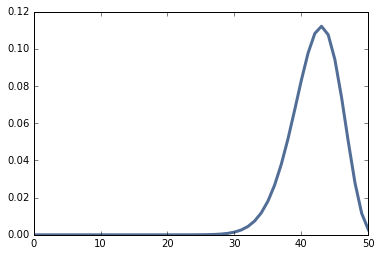

In [131]:
from thinkbayes2 import MakeMixture

mix16 = MakeMixture(metapmf16)
thinkplot.Pdf(mix16)


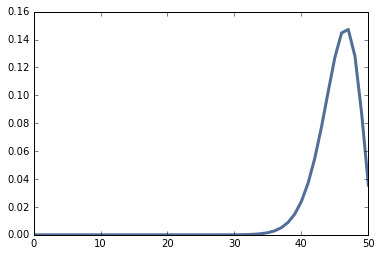

In [132]:
mix15 = MakeMixture(metapmf15)
thinkplot.Pdf(mix15)

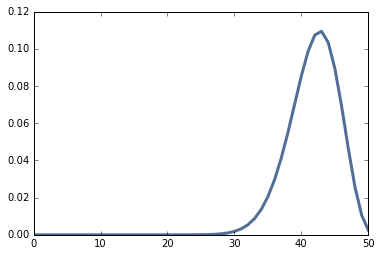

In [133]:
mix14 = MakeMixture(metapmf14)
thinkplot.Pdf(mix14)

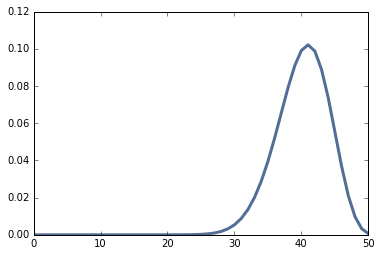

In [134]:
mix13 = MakeMixture(metapmf13)
thinkplot.Pdf(mix13)

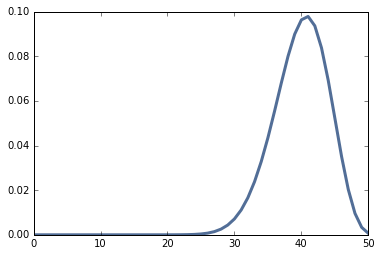

In [135]:
mix12 = MakeMixture(metapmf12)
thinkplot.Pdf(mix12)

In [137]:
prob = 0
for hypo in suite16:
    lam, k = hypo
    prob += suite16[hypo] * EvalWeibullCdf(12, lam, k)
print("Probability at 12 months", prob)

Probability at 12 months 0.731908384733


In [138]:
prob = 0
for hypo in suite12:
    lam, k = hypo
    prob += suite12[hypo] * EvalWeibullCdf(12, lam, k)
print("Probability at 12 months", prob)

Probability at 12 months 0.732195230171


In [139]:
prob = 0
for hypo in suite16:
    lam, k = hypo
    prob += suite16[hypo] * EvalWeibullCdf(9, lam, k)
print("Probability at 12 months", prob)

Probability at 12 months 0.663315748363
